# Chapter 11 

## Bagging 

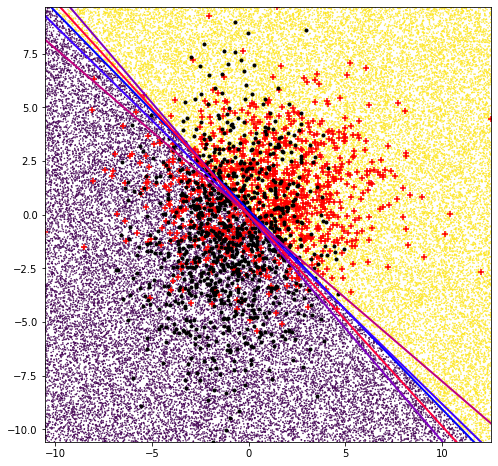

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mupos = [1, 1]
sigpos = [10, 5]
rhopos = 0
muneg = [-1, -1]
signeg = [5, 10]
roneg = 0

covpos = rhopos * np.sqrt(sigpos[0] * sigpos[1])
sigmapos = np.array([[sigpos[0], covpos], [covpos, sigpos[1]]])
covneg = roneg * np.sqrt(signeg[0] * signeg[1])
sigmaneg = np.array([[signeg[0], covneg], [covneg, signeg[1]]])

Npos = 1000
Nneg = 1000
N = Npos + Nneg
pi0 = Npos / N
pi1 = Nneg / N

pos = np.random.multivariate_normal(mupos, sigmapos, Npos)
neg = np.random.multivariate_normal(muneg, sigmaneg, Nneg)

mupos2 = [-1, -1]
sigpos2 = [0.2, 0.2]
rhopos2 = 0
muneg2 = [1, -1]
signeg2 = [0.6, 0.1]
rhoneg2 = 0.1  

covpos2 = rhopos2 * np.sqrt(sigpos2[0] * sigpos2[1])
sigmapos2 = np.array([[sigpos2[0], covpos2], [covpos2, sigpos2[1]]])
covneg2 = rhoneg2 * np.sqrt(signeg2[0] * signeg2[1])
sigmaneg2 = np.array([[signeg2[0], covneg2], [covneg2, signeg2[1]]])

Npos2 = 10
Nneg2 = 10

pos = np.vstack([
    np.random.multivariate_normal(mupos, sigmapos, Npos - Npos2),
    np.random.multivariate_normal(mupos2, sigmapos2, Npos2)
])

neg = np.vstack([
    np.random.multivariate_normal(muneg, sigmaneg, Nneg - Nneg2),
    np.random.multivariate_normal(muneg2, sigmaneg2, Nneg2)
])

xy = np.vstack([pos, neg])
xmin = np.min(xy[:, 0])
xmax = np.max(xy[:, 0])
ymin = np.min(xy[:, 1])
ymax = np.max(xy[:, 1])
xymin = np.array([xmin, ymin])
xymax = np.array([xmax, ymax])

T = 5
blc = np.zeros((T, 2))
x0blc = np.zeros((T, 2))

posBS = np.zeros_like(pos)
negBS = np.zeros_like(neg)

for t in range(T):
    for i in range(Npos):
        posBS[i, :] = pos[np.random.randint(Npos), :]
    for i in range(Nneg):
        negBS[i, :] = neg[np.random.randint(Nneg), :]

    blc[t, :] = np.mean(posBS, axis=0) - np.mean(negBS, axis=0)
    x0blc[t, :] = (np.mean(posBS, axis=0) + np.mean(negBS, axis=0)) / 2

Ntest = 50000
Te = np.tile(xymin, (Ntest, 1)) + np.tile(np.array(xymax) - np.array(xymin), (Ntest, 1)) * np.random.rand(Ntest, 2)

plt.figure(figsize=(8, 8))
plt.axis([xmin, xmax, ymin, ymax])
votes = np.zeros(Ntest)

for t in range(T):
    yleft = -(blc[t, 0] / blc[t, 1]) * (xmin - x0blc[t, 0]) + x0blc[t, 1]
    yright = -(blc[t, 0] / blc[t, 1]) * (xmax - x0blc[t, 0]) + x0blc[t, 1]

    color = [(t) / (T - 1), 0, (T - t) / (T - 1)]
    color = np.clip(color, 0, 1)  

    plt.plot([xmin, xmax], [yleft, yright], linestyle='-', color=color, linewidth=2)

    votes += np.sign((Te - np.tile(x0blc[t, :], (Ntest, 1))) @ blc[t, :])

Lb = (np.sign(votes) + 1) / 2
plt.scatter(Te[:, 0], Te[:, 1], s=1, c=Lb, marker='.')
plt.scatter(pos[:, 0], pos[:, 1], color='r', marker='+')
plt.scatter(neg[:, 0], neg[:, 1], color='k', marker='.')
plt.show()

## Boosting

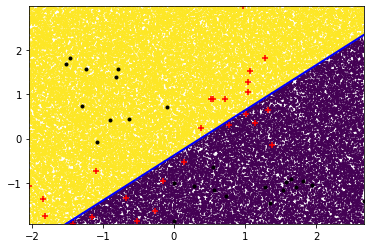

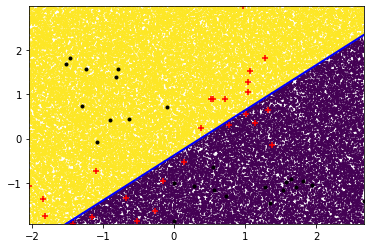

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mupos = [1, 1]
sigpos = [0.1, 0.6]
rhopos = 0.1
mupos2 = [-1, -1]
sigpos2 = [0.2, 0.2]
rhopos2 = 0
muneg = [1, -1]
signeg = [0.6, 0.1]
rhoneg = 0.1
muneg2 = [-1, 1]
signeg2 = sigpos2
rhoneg2 = rhopos2

covpos = rhopos * np.sqrt(sigpos[0] * sigpos[1])
sigmapos = np.array([[sigpos[0], covpos], [covpos, sigpos[1]]])
covpos2 = rhopos2 * np.sqrt(sigpos2[0] * sigpos2[1])
sigmapos2 = np.array([[sigpos2[0], covpos2], [covpos2, sigpos2[1]]])
covneg = rhoneg * np.sqrt(signeg[0] * signeg[1])
sigmaneg = np.array([[signeg[0], covneg], [covneg, signeg[1]]])
covneg2 = rhoneg2 * np.sqrt(signeg2[0] * signeg2[1])
sigmaneg2 = np.array([[signeg2[0], covneg2], [covneg2, signeg2[1]]])

Npos = 25
Npos2 = 10
Nneg = 25
Nneg2 = 10

pos = np.vstack([np.random.multivariate_normal(mupos, sigmapos, Npos - Npos2),
                 np.random.multivariate_normal(mupos2, sigmapos2, Npos2)])
neg = np.vstack([np.random.multivariate_normal(muneg, sigmaneg, Nneg - Nneg2),
                 np.random.multivariate_normal(muneg2, sigmaneg2, Nneg2)])

N = Npos + Nneg
pi0 = Npos / N
pi1 = Nneg / N

xy = np.vstack([pos, neg])
xmin, xmax = np.min(xy[:, 0]), np.max(xy[:, 0])
ymin, ymax = np.min(xy[:, 1]), np.max(xy[:, 1])
xymin = [xmin, ymin]
xymax = [xmax, ymax]

T = 5
blc = np.zeros((T, 2))
x0blc = np.zeros((T, 2))
weight = np.ones(N)
alpha = np.zeros(T)

for t in range(T):
    weight = weight / np.sum(weight)
    weightedmeanpos = np.dot(weight[:Npos], pos) / np.sum(weight[:Npos])
    weightedmeanneg = np.dot(weight[Npos:], neg) / np.sum(weight[Npos:])
    
    blc[t, :] = weightedmeanpos - weightedmeanneg
    x0blc[t, :] = (weightedmeanpos + weightedmeanneg) / 2
    
    pred = np.sign(np.dot(xy - np.tile(x0blc[t], (N, 1)), blc[t, :]))
    
    error = 0
    for i in range(Npos):
        if pred[i] == -1:
            error += weight[i]
    for i in range(Npos, N):
        if pred[i] == 1:
            error += weight[i]
    
    if error >= 0.5:
        break
    
    for i in range(Npos):
        if pred[i] == -1:
            weight[i] = weight[i] / (2 * error)
        else:
            weight[i] = weight[i] / (2 * (1 - error))
    for i in range(Npos, N):
        if pred[i] == 1:
            weight[i] = weight[i] / (2 * error)
        else:
            weight[i] = weight[i] / (2 * (1 - error))
    
    alpha[t] = 0.5 * np.log((1 - error) / error)

votes = np.zeros(N)
for t in range(T):
    votes += alpha[t] * np.sign(np.dot(xy - np.tile(x0blc[t], (N, 1)), blc[t, :]))

Lb = (np.sign(votes) + 1) / 2
boostederror = (np.sum(Lb[:Npos] == 0) + np.sum(Lb[Npos:] == 1)) / N

Lb2 = (np.sign(votes + np.sum(alpha) * (1 - 2 * np.random.rand(N))) + 1) / 2
boostederror2 = (np.sum(Lb2[:Npos] == 0) + np.sum(Lb2[Npos:] == 1)) / N

Ntest = 50000
Te = np.tile(xymin, (Ntest, 1)) + np.tile(np.array(xymax) - np.array(xymin), (Ntest, 1)) * np.random.rand(Ntest, 2)

plt.figure(1)
plt.axis([xmin, xmax, ymin, ymax])

votes = np.zeros(Ntest)
for t in range(T):
    if alpha[t] == 0:
        break
    yleft = -(blc[t, 0] / blc[t, 1]) * (xmin - x0blc[t, 0]) + x0blc[t, 1]
    yright = -(blc[t, 0] / blc[t, 1]) * (xmax - x0blc[t, 0]) + x0blc[t, 1]
    
    color = np.clip([(t - 1) / (T - 1), 0, (T - t) / (T - 1)], 0, 1)
    
    plt.plot([xmin, xmax], [yleft, yright], linestyle='-', color=color, linewidth=2)
    votes += alpha[t] * np.sign(np.dot(Te - np.tile(x0blc[t], (Ntest, 1)), blc[t, :]))

Lb = (np.sign(votes) + 1) / 2
plt.scatter(Te[:, 0], Te[:, 1], s=1, c=Lb)
plt.scatter(pos[:, 0], pos[:, 1], color='r', marker='+')
plt.scatter(neg[:, 0], neg[:, 1], color='k', marker='.')

plt.figure(2)
plt.axis([xmin, xmax, ymin, ymax])

for t in range(T):
    if alpha[t] == 0:
        break
    yleft = -(blc[t, 0] / blc[t, 1]) * (xmin - x0blc[t, 0]) + x0blc[t, 1]
    yright = -(blc[t, 0] / blc[t, 1]) * (xmax - x0blc[t, 0]) + x0blc[t, 1]
    
    color = np.clip([(t - 1) / (T - 1), 0, (T - t) / (T - 1)], 0, 1)
    
    plt.plot([xmin, xmax], [yleft, yright], linestyle='-', color=color, linewidth=2)

Lb2 = (np.sign(votes + np.sum(alpha) * (1 - 2 * np.random.rand(Ntest))) + 1) / 2
plt.scatter(Te[:, 0], Te[:, 1], s=1, c=Lb2)
plt.scatter(pos[:, 0], pos[:, 1], color='r', marker='+')
plt.scatter(neg[:, 0], neg[:, 1], color='k', marker='.')

plt.show()